Text(0, 0.5, 'Sigmoid function')

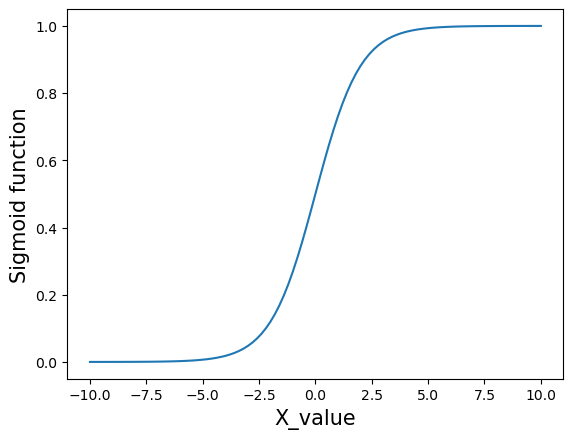

In [2]:
import numpy as np
g = lambda z : 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 101)
y = g(x) 

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("X_value", fontsize=15)
plt.ylabel("Sigmoid function", fontsize=15)

Text(0, 0.5, 'Tanh function')

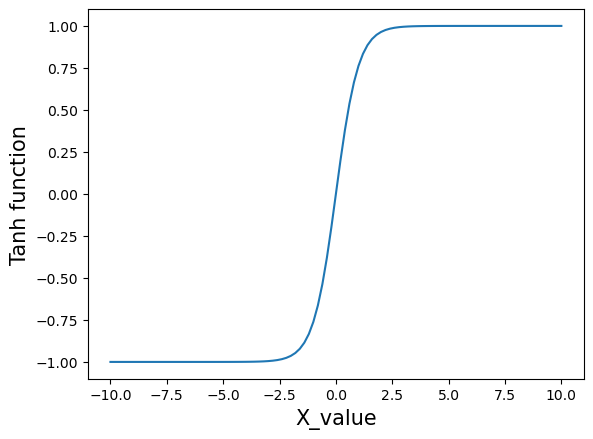

In [3]:
tanh = lambda z : (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
y_tanh = tanh(x)
plt.plot(x, y_tanh)
plt.xlabel("X_value", fontsize=15)
plt.ylabel("Tanh function", fontsize=15)


Text(0, 0.5, 'ReLU function')

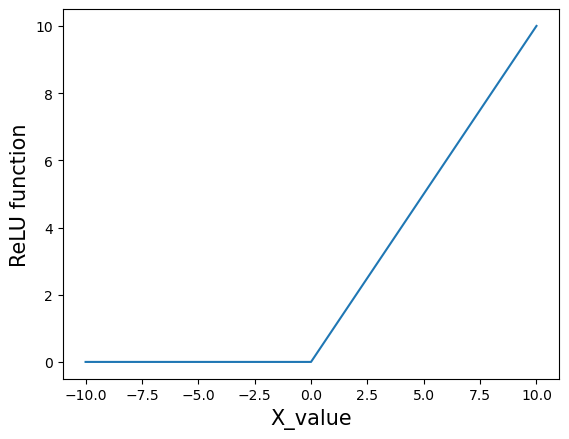

In [4]:
relu = lambda z : np.maximum(0, z)
y_relu = relu(x)
plt.plot(x, y_relu)
plt.xlabel("X_value", fontsize=15)
plt.ylabel("ReLU function", fontsize=15)


# Neural network operation

In [6]:
# Input data (x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output data (y)
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

nn = NeuralNetwork(layers=[2, 3, 1], alpha=0.1)

# Training
nn.fit(X, y, epochs=10000, verbose=100)

# Test
for i in range(len(X)):
    prediction = nn.predict(X[i:i+1])
    print(f"Input: {X[i]}, Predicted: {prediction}, Actual: {y[i]}")

Epoch 0, loss 3.095667583881564
Epoch 100, loss 2.7583001669546174
Epoch 200, loss 2.705108322226873
Epoch 300, loss 2.604633150249711
Epoch 400, loss 2.427169647999899
Epoch 500, loss 2.183430317271403
Epoch 600, loss 1.865060947752489
Epoch 700, loss 1.3862411841322948
Epoch 800, loss 0.886807121420168
Epoch 900, loss 0.572393611820616
Epoch 1000, loss 0.4001490559204597
Epoch 1100, loss 0.300387249316528
Epoch 1200, loss 0.2376233439351107
Epoch 1300, loss 0.19525616576934215
Epoch 1400, loss 0.16503464650058214
Epoch 1500, loss 0.14252841672329525
Epoch 1600, loss 0.1251872118072516
Epoch 1700, loss 0.11145441021674467
Epoch 1800, loss 0.10033238665267655
Epoch 1900, loss 0.09115517137600374
Epoch 2000, loss 0.08346265466887917
Epoch 2100, loss 0.07692752048947754
Epoch 2200, loss 0.0713109946062559
Epoch 2300, loss 0.06643505489959502
Epoch 2400, loss 0.062164419369167084
Epoch 2500, loss 0.058394543086446066
Epoch 2600, loss 0.0550434208452836
Epoch 2700, loss 0.05204586540623732

In [7]:

X = np.array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8]
])

y = np.array([
    [1, 0, 0],  
    [0, 1, 0],  
    [0, 0, 1], 
    [1, 0, 0]   
])

# Mạng neural với nhiều hidden layers
nn = NeuralNetwork(layers=[2, 4, 3, 3], alpha=0.1)  # 2 input -> 4 hidden -> 3 hidden -> 3 output

# Training
nn.fit(X, y, epochs=10000, verbose=100)

# Test
for i in range(len(X)):
    prediction = nn.predict(X[i:i+1])
    print(f"Input: {X[i]}, Predicted: {prediction}, Actual: {y[i]}")

Epoch 0, loss 8.422112604008074
Epoch 100, loss 7.269777060453405
Epoch 200, loss 7.266071429725036
Epoch 300, loss 7.260849202868607
Epoch 400, loss 7.252474461762141
Epoch 500, loss 7.238323209828306
Epoch 600, loss 7.214405435503606
Epoch 700, loss 7.17496375225507
Epoch 800, loss 7.113661516404577
Epoch 900, loss 7.0316702167351615
Epoch 1000, loss 6.944255886054851
Epoch 1100, loss 6.861825896089971
Epoch 1200, loss 6.774031973957442
Epoch 1300, loss 6.667459184016733
Epoch 1400, loss 6.53998770131721
Epoch 1500, loss 6.372038917766338
Epoch 1600, loss 6.047797869873573
Epoch 1700, loss 5.200104975774527
Epoch 1800, loss 4.037729687431724
Epoch 1900, loss 3.298076112440181
Epoch 2000, loss 2.8575739879164255
Epoch 2100, loss 2.5447202896966385
Epoch 2200, loss 2.284535168552409
Epoch 2300, loss 2.04262407510826
Epoch 2400, loss 1.8028423119227301
Epoch 2500, loss 1.5571074183618738
Epoch 2600, loss 1.3123096059675257
Epoch 2700, loss 1.0909128054618111
Epoch 2800, loss 0.909443024

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('data/diabetes.csv')

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

print(y.shape)

columns = X.columns
print(columns)

for column in columns:
    X.loc[X[column] == 0, column] = X[column].sum() / df.shape[0]


X_scaled = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Reshape y_train to match network output shape
y_train = y_train.values.reshape(-1, 1)

import models

nn = models.NeuralNetworkReLU(layers=[X_train.shape[1], 32, 16, 8, 1], alpha=0.001)

nn.fit(X_train, y_train, epochs=10000, verbose=1000)


predictions = []
for i in range(len(X_test)):
    pred = nn.predict(X_test.iloc[i:i+1].values)
    predictions.append(1 if pred >= 0.5 else 0)


accuracy = sum(predictions == y_test) / len(y_test)
print(f"Test accuracy: {accuracy:.2f}")




(768,)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Epoch 0, loss 417.2312620388471


C:\Users\manhv\AppData\Local\Temp\ipykernel_13960\2225735809.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.8450520833333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[X[column] == 0, column] = X[column].sum() / df.shape[0]
C:\Users\manhv\AppData\Local\Temp\ipykernel_13960\2225735809.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.89453125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[X[column] == 0, column] = X[column].sum() / df.shape[0]
C:\Users\manhv\AppData\Local\Temp\ipykernel_13960\2225735809.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to

Epoch 1000, loss 213.8384992024953
Epoch 2000, loss 167.20989561802725
Epoch 3000, loss 123.2426848771497


d:\nah\MachineLearning\models\NeuralNetworkRelu.py:45: RuntimeWarning: invalid value encountered in divide
  dA = [-(y/A[-1]) + ((1-y)/(1-A[-1]))]  # Output layer gradient


Epoch 4000, loss nan
Epoch 5000, loss nan
Epoch 6000, loss nan
Epoch 7000, loss nan
Epoch 8000, loss nan
Epoch 9000, loss nan
Test accuracy: 0.64


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Khởi tạo mạng neural
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 16),  # 2 hidden layers, mỗi layer 16 neurons
    activation='relu',            # ReLU activation
    solver='adam',               # optimizer
    alpha=0.0001,               # L2 regularization
    learning_rate='constant',    # learning rate
    max_iter=1000,              # số epochs
    verbose=True
)

# Training
mlp.fit(X_train, y_train)

# Dự đoán
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

c:\Users\manhv\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.71361760
Iteration 2, loss = 0.70564818
Iteration 3, loss = 0.69833006
Iteration 4, loss = 0.69129071
Iteration 5, loss = 0.68439206
Iteration 6, loss = 0.67855645
Iteration 7, loss = 0.67290538
Iteration 8, loss = 0.66779873
Iteration 9, loss = 0.66354474
Iteration 10, loss = 0.65924778
Iteration 11, loss = 0.65465171
Iteration 12, loss = 0.65042338
Iteration 13, loss = 0.64692035
Iteration 14, loss = 0.64370924
Iteration 15, loss = 0.64078156
Iteration 16, loss = 0.63816521
Iteration 17, loss = 0.63571442
Iteration 18, loss = 0.63334664
Iteration 19, loss = 0.63068073
Iteration 20, loss = 0.62823817
Iteration 21, loss = 0.62575484
Iteration 22, loss = 0.62321364
Iteration 23, loss = 0.62052253
Iteration 24, loss = 0.61777821
Iteration 25, loss = 0.61517420
Iteration 26, loss = 0.61240429
Iteration 27, loss = 0.60983244
Iteration 28, loss = 0.60723795
Iteration 29, loss = 0.60452464
Iteration 30, loss = 0.60180928
Iteration 31, loss = 0.59907024
Iteration 32, los